# Project name: Thydriod detecting using 

### All steps performed in this project
1. Spilting the original data in Training and Testing sets
2. Data analysis
3. Feature Engineering
4. Feature Importance
5. Test data (processed)
6. Spliting of training dataset
5. Model fitting using Staked Generaization
6. Hyperparameter tuning
7. Prediction with test data set

In [105]:
#Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat    
import pylab
%matplotlib inline
sns.set()


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import  RandomOverSampler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import pickle

In [2]:
#Setting to read all data columns in the Data set
pd.set_option("display.max_columns",None)

In [3]:
#Reading the given dataset
df=pd.read_csv("hypothyroid.csv")

### Splitting dataset to Train and Test data

In [4]:
#To avoid any data leakage we are going to split and perform required steps
data,test=train_test_split(df,test_size=0.2, random_state=55)

In [5]:
#Saving the training and testing datasets in csv file repectively
data.to_csv("data.csv")
test.to_csv("test.csv")

In [6]:
#Reading the training data
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,739,74,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,1.3,t,1.8,t,96,t,1.06,t,90,f,?,SVHC,negative
1,3284,75,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.33,t,1.8,t,134,t,0.97,t,138,f,?,other,negative
2,3694,31,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.4,f,?,t,104,t,0.94,t,112,f,?,STMW,negative
3,1157,34,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
4,1650,36,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,2.2,t,1.7,t,115,t,0.98,t,118,f,?,SVHC,negative


# Data Analysis

In [7]:
#Checking the shape
data.shape

(3017, 31)

In [8]:
#Reading data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 3017 non-null   int64 
 1   age                        3017 non-null   object
 2   sex                        3017 non-null   object
 3   on_thyroxine               3017 non-null   object
 4   query_on_thyroxine         3017 non-null   object
 5   on_antithyroid_medication  3017 non-null   object
 6   sick                       3017 non-null   object
 7   pregnant                   3017 non-null   object
 8   thyroid_surgery            3017 non-null   object
 9   I131_treatment             3017 non-null   object
 10  query_hypothyroid          3017 non-null   object
 11  query_hyperthyroid         3017 non-null   object
 12  lithium                    3017 non-null   object
 13  goitre                     3017 non-null   object
 14  tumor   

Here we can observe all the dtypes as object. A proper data analysis needs to be done and check the possibilities in data processing.

In [9]:
#Reading statistical data
data.describe(include="all")

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3017.000000,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017
unique,NaN,93,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,274,2,65,2,233,2,141,2,218,1,1,5,4
top,NaN,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,NaN,78,1980,2645,2972,2982,2907,2977,2977,2968,2822,2825,3002,2988,2943,3016,2874,2721,296,2399,618,2829,188,2710,307,2712,305,3017,3017,1755,2788
mean,1888.575075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1084.581680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1899.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2818.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above chart we can observe the missing values are denoted by "?" in some columns

### Missing Values

In [10]:
#Checking for columns having missing values("?") 
for col in data.columns:
    count=data[col][data[col]=="?"].count()
    if count!=0:
        print(col, count)

age 1
sex 116
TSH 296
T3 618
TT4 188
T4U 307
FTI 305
TBG 3017


In [11]:
#Replacing "?" with nan from proper analysis
data=data.replace("?",np.nan)

In [12]:
#Total null values present in columns
data.isnull().sum()

Unnamed: 0                      0
age                             1
sex                           116
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           296
T3_measured                     0
T3                            618
TT4_measured                    0
TT4                           188
T4U_measured                    0
T4U                           307
FTI_measured                    0
FTI                           305
TBG_measured                    0
TBG                          3017
referral_sourc

In [13]:
#Percentage of nan values present in the columns
feature_with_na=[feature for feature in data.columns if data[feature].isnull().sum()>0]

for i in feature_with_na:
    print(i, np.round(data[i].isnull().mean(),4), "% missing values")

age 0.0003 % missing values
sex 0.0384 % missing values
TSH 0.0981 % missing values
T3 0.2048 % missing values
TT4 0.0623 % missing values
T4U 0.1018 % missing values
FTI 0.1011 % missing values
TBG 1.0 % missing values


### Relationship between Missing values and Taget variable

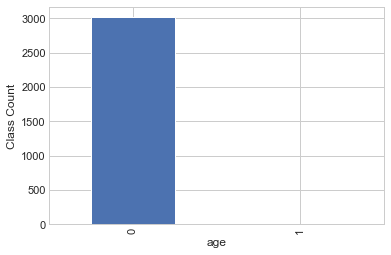

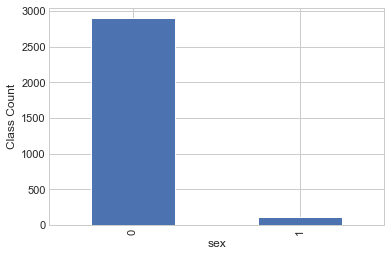

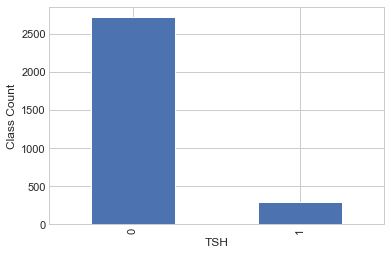

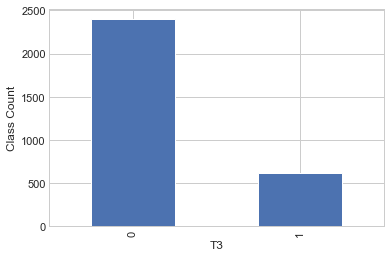

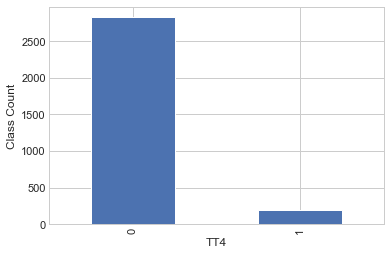

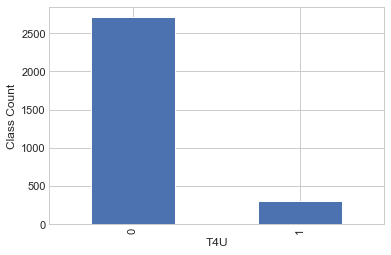

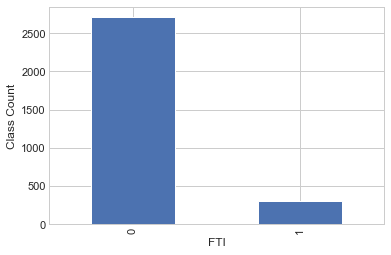

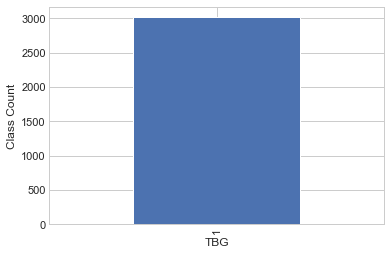

In [14]:
for feature in feature_with_na:
    dataset=data.copy()
    
    # #let's make a variable that indicates 1 if the observation was missing or zero other wise
    dataset[feature]=np.where(dataset[feature].isnull(),1,0)
    
    #Visualizing the missing data columns w.r.t to target column
    plt.style.use("seaborn-whitegrid")
    #fig = plt.figure(figsize=(18,6))
    dataset.groupby(feature).Class.count().plot.bar()
    plt.ylabel("Class Count")
    plt.show()

#From the above plots we conclude that TBG has all missing values, therefore it needs to be dropped. The others features are having some relationship between missing data and Class variable, so it needs to be Imputed.

Now checking the target variable

In [15]:
#Number of categories present in target variable
data["Class"].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

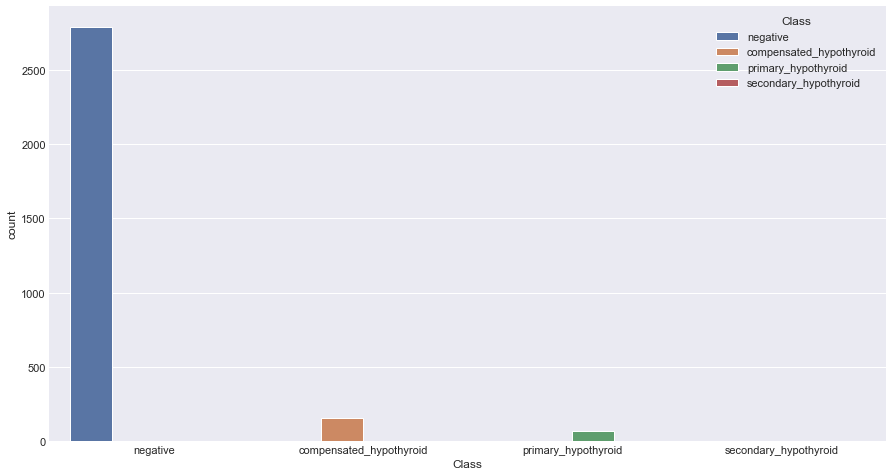

In [18]:
#Distribution of target data
plt.figure(figsize=(15,8), facecolor='white')
plt.style.use('seaborn-darkgrid')
sns.countplot(x="Class",data=data, hue="Class")

From the above distribution it is very clear that the data is imblanced so it needs to be label encoded and perform resampling

In [16]:
#Performing analysis with specific values 
data_1=data.copy()
data_1=data.iloc[:,2:17]
data_1.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f
2,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f
4,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t


In [17]:
#Descripting categories and counts of the columns
for i in data_1.columns:
    print(i,"\n-----------")
    print("The unique values are" ,data_1[i].unique())
    print("The value counts are:")
    print(data[i].value_counts())

sex 
-----------
The unique values are ['M' 'F' nan]
The value counts are:
F    1980
M     921
Name: sex, dtype: int64
on_thyroxine 
-----------
The unique values are ['f' 't']
The value counts are:
f    2645
t     372
Name: on_thyroxine, dtype: int64
query_on_thyroxine 
-----------
The unique values are ['f' 't']
The value counts are:
f    2972
t      45
Name: query_on_thyroxine, dtype: int64
on_antithyroid_medication 
-----------
The unique values are ['f' 't']
The value counts are:
f    2982
t      35
Name: on_antithyroid_medication, dtype: int64
sick 
-----------
The unique values are ['f' 't']
The value counts are:
f    2907
t     110
Name: sick, dtype: int64
pregnant 
-----------
The unique values are ['f' 't']
The value counts are:
f    2977
t      40
Name: pregnant, dtype: int64
thyroid_surgery 
-----------
The unique values are ['f' 't']
The value counts are:
f    2977
t      40
Name: thyroid_surgery, dtype: int64
I131_treatment 
-----------
The unique values are ['f' 't']
The

From the above data we understand the Categorical unique values are as follows:

M- Male(Sex)

F- Female(Sex) 

f- False

t- True

Therefore the categories needs to be Imputed

In [21]:
data.head()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,739,74,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,1.3,t,1.8,t,96,t,1.06,t,90,f,NaN,SVHC,negative
1,3284,75,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.33,t,1.8,t,134,t,0.97,t,138,f,NaN,other,negative
2,3694,31,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.4,f,NaN,t,104,t,0.94,t,112,f,NaN,STMW,negative
3,1157,34,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
4,1650,36,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,2.2,t,1.7,t,115,t,0.98,t,118,f,NaN,SVHC,negative


In [18]:
#Performing analysis of numerical column with its similar measured column 
data_2=data.copy()
data_2=data_2[["TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG"]]
data_2.head(15)

,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,t,1.3,t,1.8,t,96,t,1.06,t,90,f,NaN
1,t,0.33,t,1.8,t,134,t,0.97,t,138,f,NaN
2,t,3.4,f,NaN,t,104,t,0.94,t,112,f,NaN
3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN
4,t,2.2,t,1.7,t,115,t,0.98,t,118,f,NaN
5,t,1.4,t,1.4,t,115,t,0.97,t,118,f,NaN
6,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN
7,t,1.4,t,1.4,t,90,t,0.91,t,100,f,NaN
8,t,0.5,t,3.2,t,137,t,1.16,t,119,f,NaN
9,t,0.55,f,NaN,t,180,t,1.05,t,172,f,NaN


The data shown above are having some NaN values in numerical columns and there is a relationship between the NaN and "f" category of similar measured column. So we will analyse the relationship and its category counts

T3_measured
f       0
t    2399
Name: T3, dtype: int64


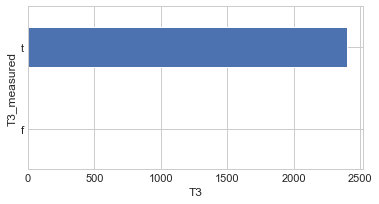

In [19]:
#Relationship between T3 with T3_measured
grp_T3=data_2.groupby("T3_measured")["T3"].count()
print(grp_T3)
plt.figure(figsize=(6,3))
grp_T3.plot.barh()
plt.xlabel("T3")
plt.show()

TSH_measured
f       0
t    2721
Name: TSH, dtype: int64


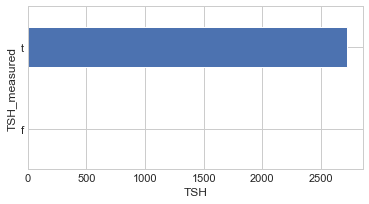

In [20]:
#Relationship between TSH with TSH_measured
grp_TSH=data_2.groupby("TSH_measured")["TSH"].count()
print(grp_TSH)
plt.figure(figsize=(6,3))
grp_TSH.plot.barh()
plt.xlabel("TSH")
plt.show()

TT4_measured
f       0
t    2829
Name: TT4, dtype: int64


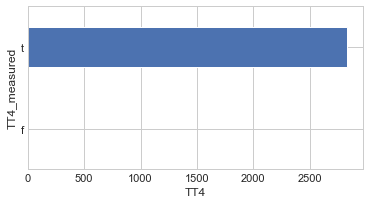

In [21]:
#Relationship between TT4 with TT4_measured
grp_TT4=data_2.groupby("TT4_measured")["TT4"].count()
print(grp_TT4)
plt.figure(figsize=(6,3))
grp_TT4.plot.barh()
plt.xlabel("TT4")
plt.show()

T4U_measured
f       0
t    2710
Name: T4U, dtype: int64


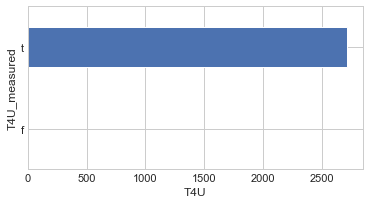

In [22]:
#Relationship between T4U with T4U_measured
grp_T4U=data_2.groupby("T4U_measured")["T4U"].count()
print(grp_T4U)
plt.figure(figsize=(6,3))
grp_T4U.plot.barh()
plt.xlabel("T4U")
plt.show()

FTI_measured
f       0
t    2712
Name: FTI, dtype: int64


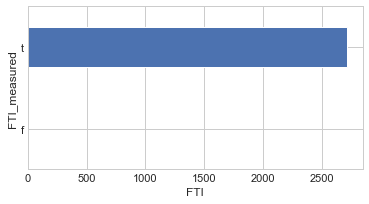

In [23]:
#Relationship between FTI with FTI_measured
grp_FTI=data_2.groupby("FTI_measured")["FTI"].count()
print(grp_FTI)
plt.figure(figsize=(6,3))
grp_FTI.plot.barh()
plt.xlabel("FTI")
plt.show()

In [28]:
#Incase of TBG_measured 
data_2["TBG_measured"].value_counts()

f    3017
Name: TBG_measured, dtype: int64

From all the above observation we can conclude that the respected columns the category "f" i.e False are not present or realted as NaN velues w.r.t numerical column. So we can drop the columns and the rest missing can be handled. In case of TGB all values are missing and TGB_measured has ony 1 unique value, hence it needs to be dropped

# Feature Engineering

In [25]:
#Replacing all categorical values where unqinue values are "f","t","M","F" instead of One hot encoding
#"f"=False,"t"=True, "M"=Male, "F"=Female
data=data.replace({"f":0,"t":1,"M":0,"F":1})

In [26]:
#Dropping the unwanted columns and Null column(TBG)
data.drop(["Unnamed: 0","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured","TBG"],axis=1, inplace=True)

In [27]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1.8,96,1.06,90,SVHC,negative
1,75,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,1.8,134,0.97,138,other,negative
2,31,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.4,NaN,104,0.94,112,STMW,negative
3,34,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,other,negative
4,36,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.2,1.7,115,0.98,118,SVHC,negative


In [28]:
##As referral_source column is Nominal Categorical data we will use One Hot Encoding
data.referral_source.unique()

array(['SVHC', 'other', 'STMW', 'SVI', 'SVHD'], dtype=object)

In [29]:
#One hot encding
data = pd.get_dummies(data, columns=['referral_source'])

In [31]:
# In case of Target column
data.Class.value_counts()

negative                   2788
compensated_hypothyroid     159
primary_hypothyroid          69
secondary_hypothyroid         1
Name: Class, dtype: int64

In [32]:
#The target column i.e Class has 4 categories and is Ordinal categorical data, so we will using Label Encoder function
LblEnc = LabelEncoder()
data.Class=LblEnc.fit_transform(data.Class)

In [33]:
#Count of categories
data.Class.value_counts()

1    2788
0     159
2      69
3       1
Name: Class, dtype: int64

In [34]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,74,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1.8,96,1.06,90,1,0,1,0,0,0
1,75,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,1.8,134,0.97,138,1,0,0,0,0,1
2,31,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.4,NaN,104,0.94,112,1,1,0,0,0,0
3,34,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1
4,36,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.2,1.7,115,0.98,118,1,0,1,0,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3016 non-null   object 
 1   sex                        2901 non-null   float64
 2   on_thyroxine               3017 non-null   int64  
 3   query_on_thyroxine         3017 non-null   int64  
 4   on_antithyroid_medication  3017 non-null   int64  
 5   sick                       3017 non-null   int64  
 6   pregnant                   3017 non-null   int64  
 7   thyroid_surgery            3017 non-null   int64  
 8   I131_treatment             3017 non-null   int64  
 9   query_hypothyroid          3017 non-null   int64  
 10  query_hyperthyroid         3017 non-null   int64  
 11  lithium                    3017 non-null   int64  
 12  goitre                     3017 non-null   int64  
 13  tumor                      3017 non-null   int64

Now the data are converted to numeric but the some data types remains as object. So we are going to transform the data types of particular columns.

In [37]:
# Selecting columns with data type as 'object'
columns = data.columns[data.dtypes=="O"]

# Convert to numeric values
data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

#### Visualizing the patterns of the missing data columns

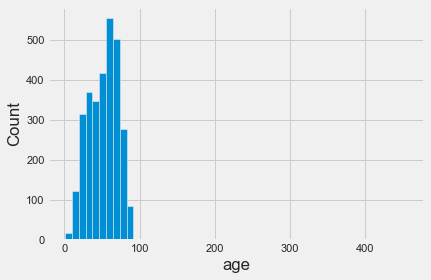

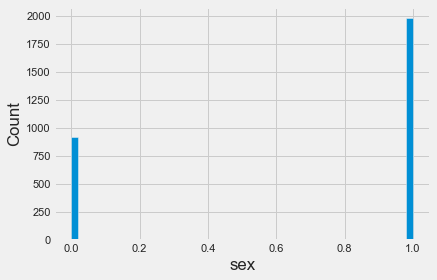

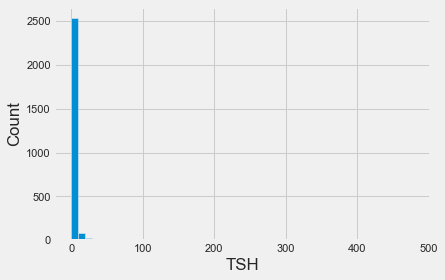

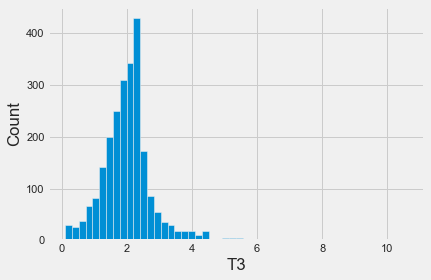

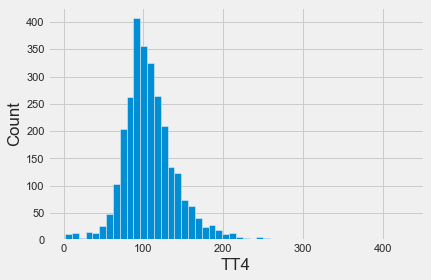

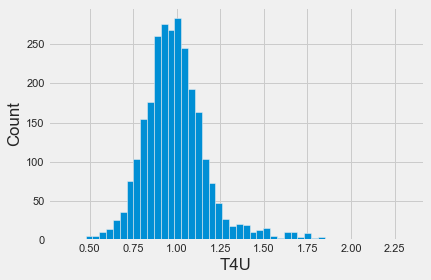

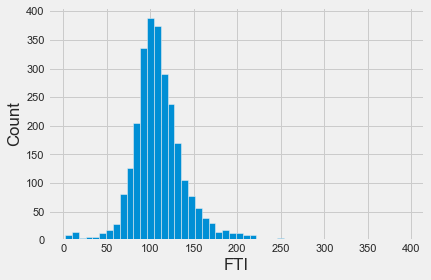

In [41]:
# List of columns containing null values
missing_col=data.columns[data.isnull().any()]

#converting in list
missing_col.to_list()

#plotting
for i in missing_col:
    plt.style.use('fivethirtyeight')
    data[i].plot.hist(bins=50)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()

Based on the statistics plotted above, we can see that,

-The features "Age" and "T4U" show a normal distribution, which is why we will be replacing the missing values with mean.

-The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution, which is why we will be replacing the missing values with median.

-The feature "gender" is binary and contains an imbalanced data with the values "1" much greater then "0". So we will be replacing the missing values with "0".

In [38]:
# Replacing null values by mean 
data['age'].fillna(data['age'].mean(), inplace = True)
data['T4U'].fillna(data['T4U'].mean(), inplace = True)

# Replacing null values by median
data['TSH'].fillna(data['TSH'].mean(), inplace = True)
data['T3'].fillna(data['T3'].median(), inplace = True)
data['TT4'].fillna(data['TT4'].median(), inplace = True)
data['FTI'].fillna(data['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
data['sex'].fillna(0, inplace = True)

In [39]:
#From the distribution graphs above we observe the data are slightly skewed. Therefore inputing the continous data variables
cont_data=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

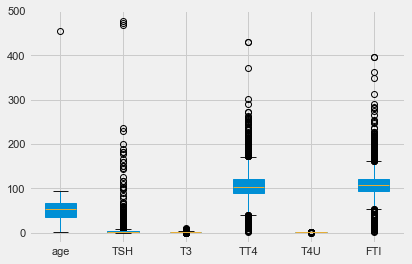

In [41]:
#Checking Outliers of numerical column

plt.style.use('fivethirtyeight')
data[cont_data].boxplot(patch_artist=True)

In [42]:
#Also understanding the statistical vies of numerical columns
data[cont_data].describe()

,age,TSH,T3,TT4,T4U,FTI
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,51.681034,4.802810,2.015413,108.085549,0.995138,110.162048
std,20.258583,20.893998,0.733771,34.824879,0.186445,31.341377
min,1.000000,0.005000,0.100000,2.000000,0.360000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.600000,2.000000,103.000000,0.995138,107.000000
75%,67.000000,3.700000,2.200000,122.000000,1.070000,121.000000
max,455.000000,478.000000,10.600000,430.000000,2.320000,395.000000


From the description above the difference between Min value and 25 percentile and Max value and 75 percentile is huge.

First we need to verify what percentage of values are going and what are remaining outside lower and upper bridges.

In this case we will handle the oultiers with InterQuantile Range (IQR)

In [45]:
IQR=data[cont_data].quantile(0.75) - data[cont_data].quantile(0.25)   
print("The respective Interquantile range  is: \n---------------------")
print(IQR)

##Same steps are followed : (IQR is multiplied with a constant to discern outlier)
lower_bridge=data[cont_data].quantile(0.25) - (IQR*1.5)  
upper_bridge=data[cont_data].quantile(0.75) + (IQR*1.5)
print("The Lower bridge is: \n---------------------")
print(lower_bridge)
print("The Upper bridge is: \n---------------------")
print(upper_bridge)

The respective Interquantile range  is: 
---------------------
age    31.00
TSH     3.10
T3      0.50
TT4    33.00
T4U     0.18
FTI    27.00
dtype: float64
The Lower bridge is: 
---------------------
age   -10.50
TSH    -4.05
T3      0.95
TT4    39.50
T4U     0.62
FTI    53.50
dtype: float64
The Upper bridge is: 
---------------------
age    113.50
TSH      8.35
T3       2.95
TT4    171.50
T4U      1.34
FTI    161.50
dtype: float64


In [46]:
##Replacing the Outlier with the Max Age value and Min value in respected Columns

#Age (neglecting negative values in this case)
data.loc[data.age>113.50,'age']=113.50 
#TSH
data.loc[data.TSH<-4.05,'age']=-4.05
data.loc[data.TSH>8.35,'age']=8.35
#T3
data.loc[data.T3<0.95,'age']=0.95 
data.loc[data.T3>2.95,'age']=2.95
#TT4
data.loc[data.TT4<39.50,'age']=39.50 
data.loc[data.TT4>171.50,'age']=171.50
#T4U
data.loc[data.T4U<0.62,'age']=0.62 
data.loc[data.T4U>1.34,'age']= 1.34
#FTI
data.loc[data.FTI<53.50,'age']=53.50 
data.loc[data.FTI>161.50,'age']=161.50

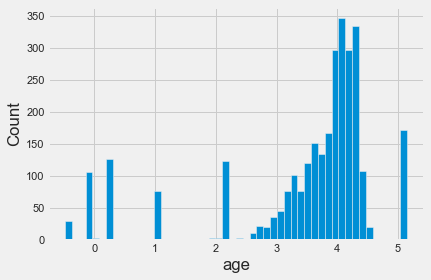

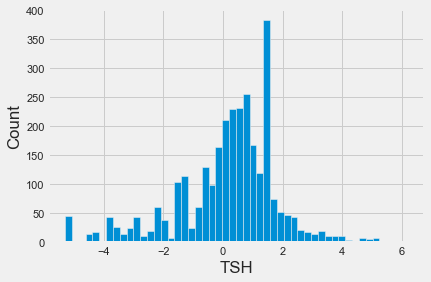

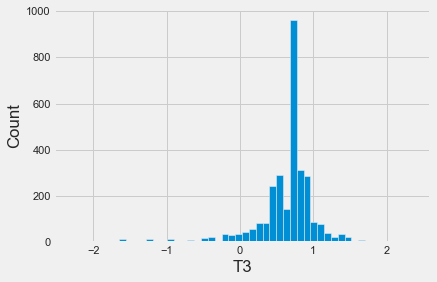

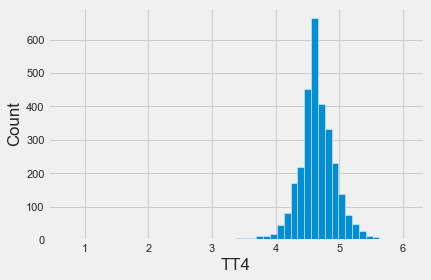

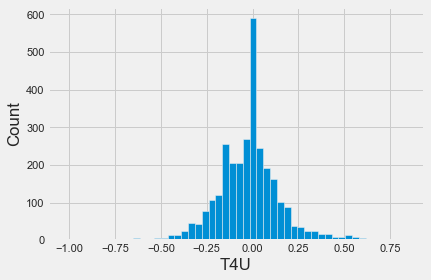

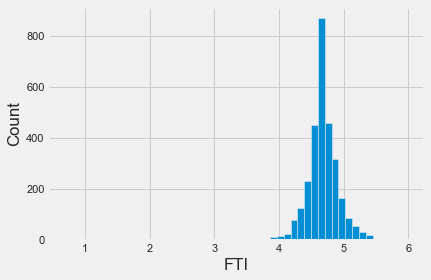

In [47]:
#Log Transforming the distribution into Gaussian distribution
data[cont_data]=np.log(data[cont_data])

for i in cont_data:
    plt.style.use('fivethirtyeight')
    data[i].plot.hist(bins=50)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()
    plt.show()

In [48]:
#The final training dataset shape:
data.shape

(3017, 27)

Now let's see how balanced our dataset in terms of given target classes

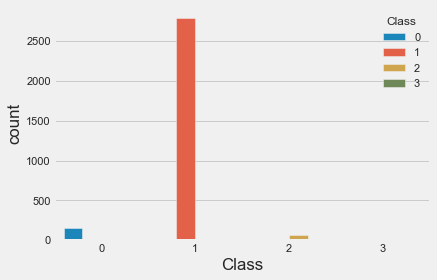

In [49]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Class",data=data,hue="Class")

We can clerly see that the dataset is highly imbalanced.

We will use a python library known as imbalanced-learn to deal with imbalanced data. Imbalanced learn has an algorithm called RandomOverSampler which will handle such imbalnce data.

In [51]:
#Target column
Y=data[["Class"]]
#Features columns
features=[i for i in data.columns.to_list() if i not in ["Class"]]

In [52]:
#shapes of features and target columns
X=data[features]
print(X.shape, Y.shape)

(3017, 26) (3017, 1)


In [53]:
#Applying Random Over Samplying from Imblearn module
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(X,Y)

In [54]:
#The new shape of feature and target columns
x_ros.shape,y_ros.shape

((11152, 26), (11152, 1))

In [55]:
#Before Sampling
Y["Class"].value_counts()

1    2788
0     159
2      69
3       1
Name: Class, dtype: int64

In [56]:
#After Sampling
y_ros["Class"].value_counts()

0    2788
1    2788
2    2788
3    2788
Name: Class, dtype: int64

# Feature Importance

In [54]:
#Finding important feature using Extra tree Regressor

f_selection=ExtraTreesRegressor()
f_selection.fit(x_ros,y_ros)

<ipython-input-54-7ea6e2392e30>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  f_selection.fit(x_ros,y_ros)


ExtraTreesRegressor()

In [55]:
print(f_selection.feature_importances_) 

[3.72738197e-02 1.02727214e-02 7.56429012e-03 5.96924611e-05
 3.45156085e-05 3.95546210e-04 3.93634453e-05 1.87649157e-03
 4.74204543e-05 2.08551752e-01 1.68154223e-04 7.06883574e-05
 3.59290364e-05 4.46049399e-04 1.36791754e-06 2.72413018e-04
 2.61929732e-01 1.46134535e-02 3.24338801e-01 7.37058873e-03
 1.08899699e-01 1.15188615e-02 3.94954793e-04 9.67779037e-05
 1.14758127e-03 2.57933494e-03]


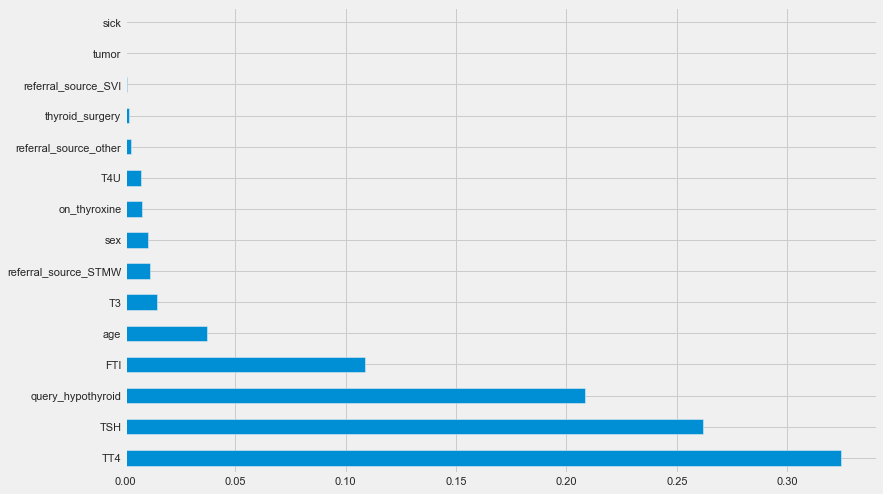

In [56]:
#Plotting of 15 largest important features
plt.figure(figsize=(12,8))

feat_importances=pd.Series(f_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind="barh")
plt.show()

# Test Data

For testing the test data will also be performed for data processing and to check the prediction whether the model is overfitted or not.

In [57]:
test_data=pd.read_csv("test.csv")
test_data.head()

,Unnamed: 0,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,2718,31,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,2.3,t,132,t,1.16,t,114,f,?,other,negative
1,3064,19,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.6,t,2.3,t,100,t,0.94,t,106,f,?,other,negative
2,3739,22,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.3,t,83,t,0.97,t,85,f,?,SVHC,negative
3,2731,48,F,t,f,f,f,f,f,f,f,f,t,f,f,f,f,t,1.5,t,2.5,t,101,t,0.97,t,104,f,?,SVHC,negative
4,2736,74,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,2.4,t,1.2,t,95,t,0.8,t,119,f,?,SVHC,negative


In [58]:
#Replacing '?' with NaN
test_data=test_data.replace("?",np.nan)

In [59]:
test_data.isnull().sum()

Unnamed: 0                     0
age                            0
sex                           34
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                           73
T3_measured                    0
T3                           151
TT4_measured                   0
TT4                           43
T4U_measured                   0
T4U                           80
FTI_measured                   0
FTI                           80
TBG_measured                   0
TBG                          755
referral_source                0
Class     

In [60]:
#Labelling specified categories
test_data=test_data.replace({"f":0,"t":1,"M":0,"F":1})

In [61]:
#Dropping unnecessary columns
test_data.drop(["Unnamed: 0","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured","TBG"],axis=1, inplace=True)

In [62]:
#One hot encoding on referral_source
test_data = pd.get_dummies(test_data, columns=['referral_source'])

In [63]:
#Transforming the test data with labels 
LblEnc = LabelEncoder()
test_data.Class=LblEnc.fit_transform(test_data.Class)

In [64]:
# Selecting columns with data type as 'object'
columns = test_data.columns[test_data.dtypes=="O"]

# Convert to numeric data-types
test_data[columns] = test_data[columns].apply(pd.to_numeric, errors='coerce')

In [65]:
# Replacing null values by mean 
test_data['age'].fillna(test_data['age'].mean(), inplace = True)
test_data['T4U'].fillna(test_data['T4U'].mean(), inplace = True)

# Replacing null values by median
test_data['TSH'].fillna(test_data['TSH'].mean(), inplace = True)
test_data['T3'].fillna(test_data['T3'].median(), inplace = True)
test_data['TT4'].fillna(test_data['TT4'].median(), inplace = True)
test_data['FTI'].fillna(test_data['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
test_data['sex'].fillna(0, inplace = True)

In [66]:
#Seperating target column in test data
Y_test=test_data["Class"]

#Selecting all independent columns
test_data.drop(["Class"],axis=1,inplace=True)

In [68]:
#Selecting all numerical columns
test_cont_data=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [69]:
#Performing log transformation
test_data[test_cont_data]=np.log(test_data[test_cont_data])

In [70]:
#Final shape of test data
test_data.shape

(755, 26)

In [71]:
test_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,3.433987,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.788457,0.832909,4.882802,0.148420,4.736198,0,0,0,0,1
1,2.944439,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.510826,0.832909,4.605170,-0.061875,4.663439,0,0,0,0,1
2,3.091042,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.262364,0.832909,4.418841,-0.030459,4.442651,0,1,0,0,0
3,3.871201,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.405465,0.916291,4.615121,-0.030459,4.644391,0,1,0,0,0
4,4.304065,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.875469,0.182322,4.553877,-0.223144,4.779123,0,1,0,0,0


## Stacked Generalization (Stacking)

Stacking is a type of ensemble technique which combines the predictions of two or more models, also called base models, and use the combination as the input for a new model (meta-model) i.e. a new model is trained on the predictions of the base models. 

We are going to perform this process for training the data predict the outcome "Class"

# Spliting Data

In [72]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(x_ros,y_ros,test_size=0.5, random_state= 355)

In [73]:
# Again let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

We will use to base models K-Nearest Neighbors and Support Vector Classifier. Then we are going to stack the predicted training set to fit in the meta model i.e Random Forrest. The accuracy of meta model will be measured and tuned for optimum output

In [75]:
##Using K-Nearest Neighbors Classifier (Base1 model)
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
print(f"The accuracy score of training set: {knn.score(x_train,y_train)}")
print(f"The accuracy score of test set: {knn.score(x_test,y_test)}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy score of training set: 0.9899103139013453
The accuracy score of test set: 0.9910394265232975


In [76]:
#Using Support Vector Classifier
svm = SVC()

svm.fit(x_train,y_train)
print(f"The accuracy score of training set: {svm.score(x_train,y_train)}")
print(f"The accuracy score of test set: {svm.score(x_test,y_test)}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The accuracy score of training set: 0.9748878923766816
The accuracy score of test set: 0.9802867383512545


Let's get the predictions of all the base models on the validation set val_train.

In [77]:
#Prediction for Base 1 model
predict_val1 = knn.predict(val_train)
#Perdiction for Base 2 model
predict_val2 = svm.predict(val_train)

Let's stack the prediciton values for validation set together as "predict_val"

In [78]:
#Stacking
predict_val = np.column_stack((predict_val1,predict_val2))
predict_val

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [1, 1],
       [0, 1],
       [1, 1]])

Let's get the prediction for all the base models on the test set  x_test

In [80]:
#Prediction for Base 1 test set
predict_test1 = knn.predict(x_test)
#Prediction for Base 2 test set
predict_test2 = svm.predict(x_test)

Let's stack the prediciton values for validation set together as "predict_test"

In [81]:
#Stacking
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[3, 3],
       [0, 0],
       [1, 1],
       ...,
       [0, 0],
       [1, 1],
       [2, 2]])

Let's use the Use the stacked data "predict_val" and val_test as the input feature for meta_model i.e. RandomForest classifier

In [83]:
#Using RandomForrest Classifier as meta model
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)

<ipython-input-83-10055a59f197>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(predict_val,val_test)


RandomForestClassifier()

Let's check the accuracy of our meta_model using predict_test and y_test.

In [84]:
print(f"The accuracy score of stacked_train set: {rand_clf.score(predict_val,val_test)}")
print(f"The accuracy score of test set: {rand_clf.score(predict_test,y_test)}")

The accuracy score of stacked_train set: 0.9919296987087518
The accuracy score of test set: 0.9955197132616488


Creating pickle file for models

In [85]:
#Base models
file=open("SupportVector_clf.pkl", "wb")
pickle.dump(svm, file)

file=open("KNN.pkl", "wb")
pickle.dump(knn, file)

#Meta model
file=open("RandomForest_clf.pkl", "wb")
pickle.dump(rand_clf, file)

# Hyperparameter tuning the meta-model

In [86]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [87]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,
                           cv=5,n_jobs =-1,verbose = 3)

In [105]:
grid_search.fit(predict_val,val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [106]:
#Loading for the best parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [107]:
rand_clf_tuned = RandomForestClassifier( criterion='entropy',max_features = 'log2',min_samples_leaf =2,min_samples_split= 5,n_estimators =100)

In [108]:
#Fiting the data into model with optimum parameters
rand_clf_tuned.fit(predict_val,val_test)

<ipython-input-108-9a789d11c1b4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf_tuned.fit(predict_val,val_test)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

In [88]:
print(f"The accuracy score after tuning the meta model: {rand_clf.score(predict_test,y_test)}")

The accuracy score after tuning the meta model: 0.9955197132616488


In [110]:
#Dumping the tuned model in pickle file
file=open("RandomForest_tuned.pkl", "wb")
pickle.dump(rand_clf_tuned, file)

In [89]:
#Loading base models
base1=open("KNN.pkl", "rb")
knn_base=pickle.load(base1)

base2=open("SupportVector_clf.pkl", "rb")
svm_base=pickle.load(base2)

meta_model=open("RandomForest_clf.pkl","rb")
r_forest=pickle.load(meta_model)

# Prediction with test data set

In [91]:
#Similar steps need to perform 
#Predicting for Base 1 model
knn_pred=knn_base.predict(test_data)
#Predicting for Base 2 model
svm_pred=svm_base.predict(test_data)

In [92]:
#Stacking
predict_test_data = np.column_stack((knn_pred,svm_pred))

In [95]:
print(f"The final accuracy score for test data: {r_forest.score(predict_test_data,Y_test)}")

The final accuracy score for test data: 0.9112582781456954


# Conclusion 

The meta model after stacking with base models has given a accuracy of 91.1% for test data set avoiding overfitting.